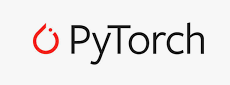

In [137]:
#from google.colab import drive
#drive.mount('/content/drive')

# PyTorch

* 페이스북이 초기 Lua 언어로 개발된 Torch를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 Torch는 NumPy 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 DL Framework로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

## PyTorch Module Structure

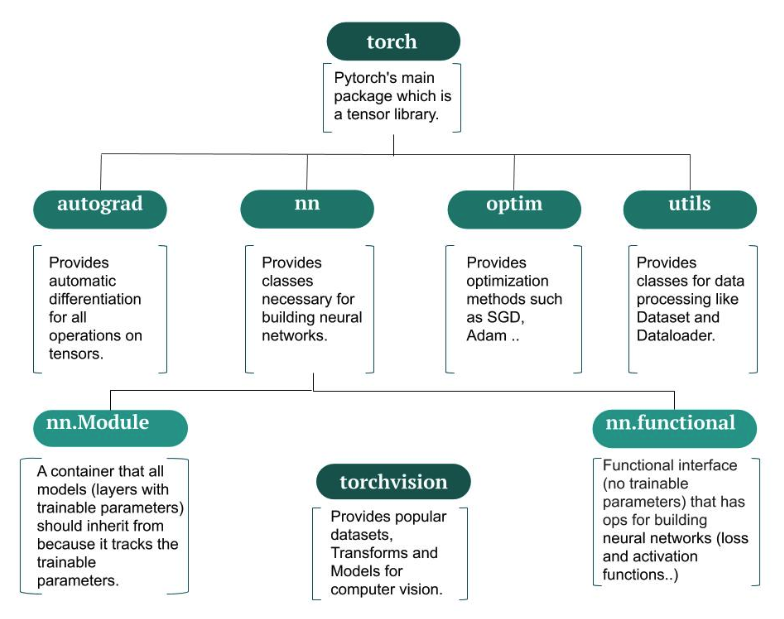

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

<small>ref: https://manalelaidouni.github.io/Pytorch%20guide%20101.html</small>

## Tensors

* 데이터 표현을 위한 기본 구조로 Tensor를 사용
* 텐서는 데이터를 담기위한 container로서 일반적으로 수치형 데이터를 저장
* NumPy의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

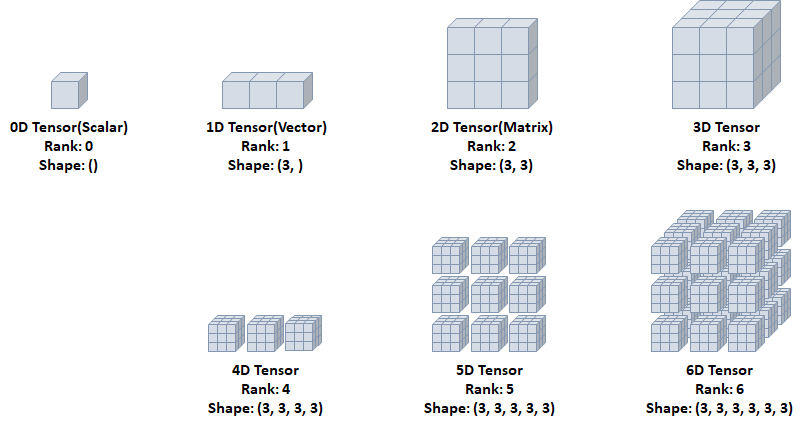

In [1]:
import torch
torch.__version__

'2.0.0'

## Linear Regression Model

### Data Generation

### Define Model and Parameter

### Loss Function and Optimizer

### Model Training

### Tensor Initialization and Datatype

Uninitialized Tensor

Randomly initialized Tensor

Tensor with dtype = long and value = 0

Initialization based on user-defined value

Tensor with 2 x 4 shape, double type, value 1

Tensor with same size with x, float type, ramdomly assignment

Get Tensor size

### Data Type

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

### Change Datatype of Tensor

### CUDA Tensors

- `.to` : Tensor can be transfered from devices (cpu, gpu) to devices (cpu, gpu)

### Multidimension Tensor Expression

0D Tensor (Scalar)

* Tensor contains only one value
* No axis and shape

1D Tensor (Vector)

* Tensor store values like python list
* One axis

2D Tensor (Matrix)

* Two axes
* General data can be converted to 2D Tensor
* Usually, represent samples-Features structure  

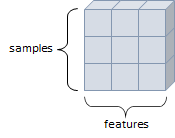

3D Tensor

* cube shape (3 axes)
* Sequential data or timeline data
* Usually, samples-timesteps-features Structure

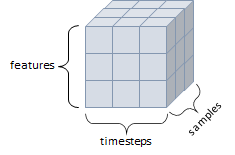

4D Tensor

* 4 axes
* Color image data (gray image data is 3D Tensor)
* Usually, samples-height-width-color channel Structure

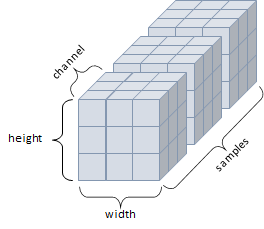

5D Tensor

* 5 axes
* Video data is one of the representative data
* samples-frames-height-width-color channel Structure

### Tensor Operations

* Mathmatical, trigonometric functions, bitwise operation, comparison etc..

`max`, `min` return argmax and argmin when `dim` parameter is applied
- argmax: index of max value
- argmin: index of min value



if we provide max and min with dim parameter, argmax and argmin will be returned

argmax: index for max
argmin: index for min

The way to understand the “axis” of numpy or "dim" of torch is that it collapses the specified axis. So when it collapses the axis 0 (the row), it becomes just one row (it sums column-wise).

`torch.add`: addition

`in-place` method
  - when we put `_` after operation, in-place method is applied.
  - `x.copy_(y), x.t_()`

`torch.sub`: substract

`torch.mul`: multiply (element-wise)

`torch.div`: divide (element-wise)

`torch.mm`: dot product (inner-product)

### Tensor Manipulations

Tensor Indexing: same with NumPy Indexing

`view`: Change the size of Tensor or shape of Tensor

- Basically, the number of element in Tensor should be maintained.
- When we set `-1`, Torch automatically calculate corresponding size of Tensor

`item`: get a item from Tensor when Tensor only has one scalar value


`squeeze`: remove or reduce the dimension of Tensor

`unsqueeze`: Increase or make new dimension of Tensor

`stack`: Stack between Tensors

`cat`: Method for concatenating Tensors

- similar to Numpy `stack`, but `dim` parameter is required.
- increase corresponding `dim` and concatenate


`chunk`: split Tensor with the number of Tensors

`split`: similar to the `chunk` but input parameters are different.

torch ↔ numpy
- Convert Torch Tensor to NumPy array
  - `numpy()`
  - `from_numpy()`
- If Tensor is stored on CPU, NumPy array share the memory space, so when one value is changed, the other values are also changed.

## Autograd

- `torch.autograd` package provide **autograd** for all operation of Tensor
- For the `backprop`, differential values are automatically calculated.

When `requires_grad` property is set to `True`, all operations to the Tensor are traced.

To terminate the trace, call `.detach()` method to separate the value from operation recording.

`requires_grad_(...)` method change the `requires_grad` value of the Tensor

`grad_fn`: Store information about function for gradiant calculation

### Gradient (Slope)

When operation is ended, calling `.backward()` method calculate backpropagation and accumulate the value in the, `.grad` property

`grad`: Store gradiant value for the data

Gradiant update can be turned off with `with torch.no_grad()` method

To prevent trace of gradient information, wrap code block with `with torch.no_grad()` method. This is usefull to evaluate the model because  only `requires_grad=True` is applied to the model.

`detach()`: same content, but `require_grad` are different

### Example of Autograd

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- Through `backward()`, $a \leftarrow b  \leftarrow c  \leftarrow out $ can be calculated and $\frac{\partial out}{\partial a}$ values are stroed in `a.grad`

$b = a + 2$

$c = b^2$

`grad_fn` of a is None because there is no operation on the a

## 신경망 종류

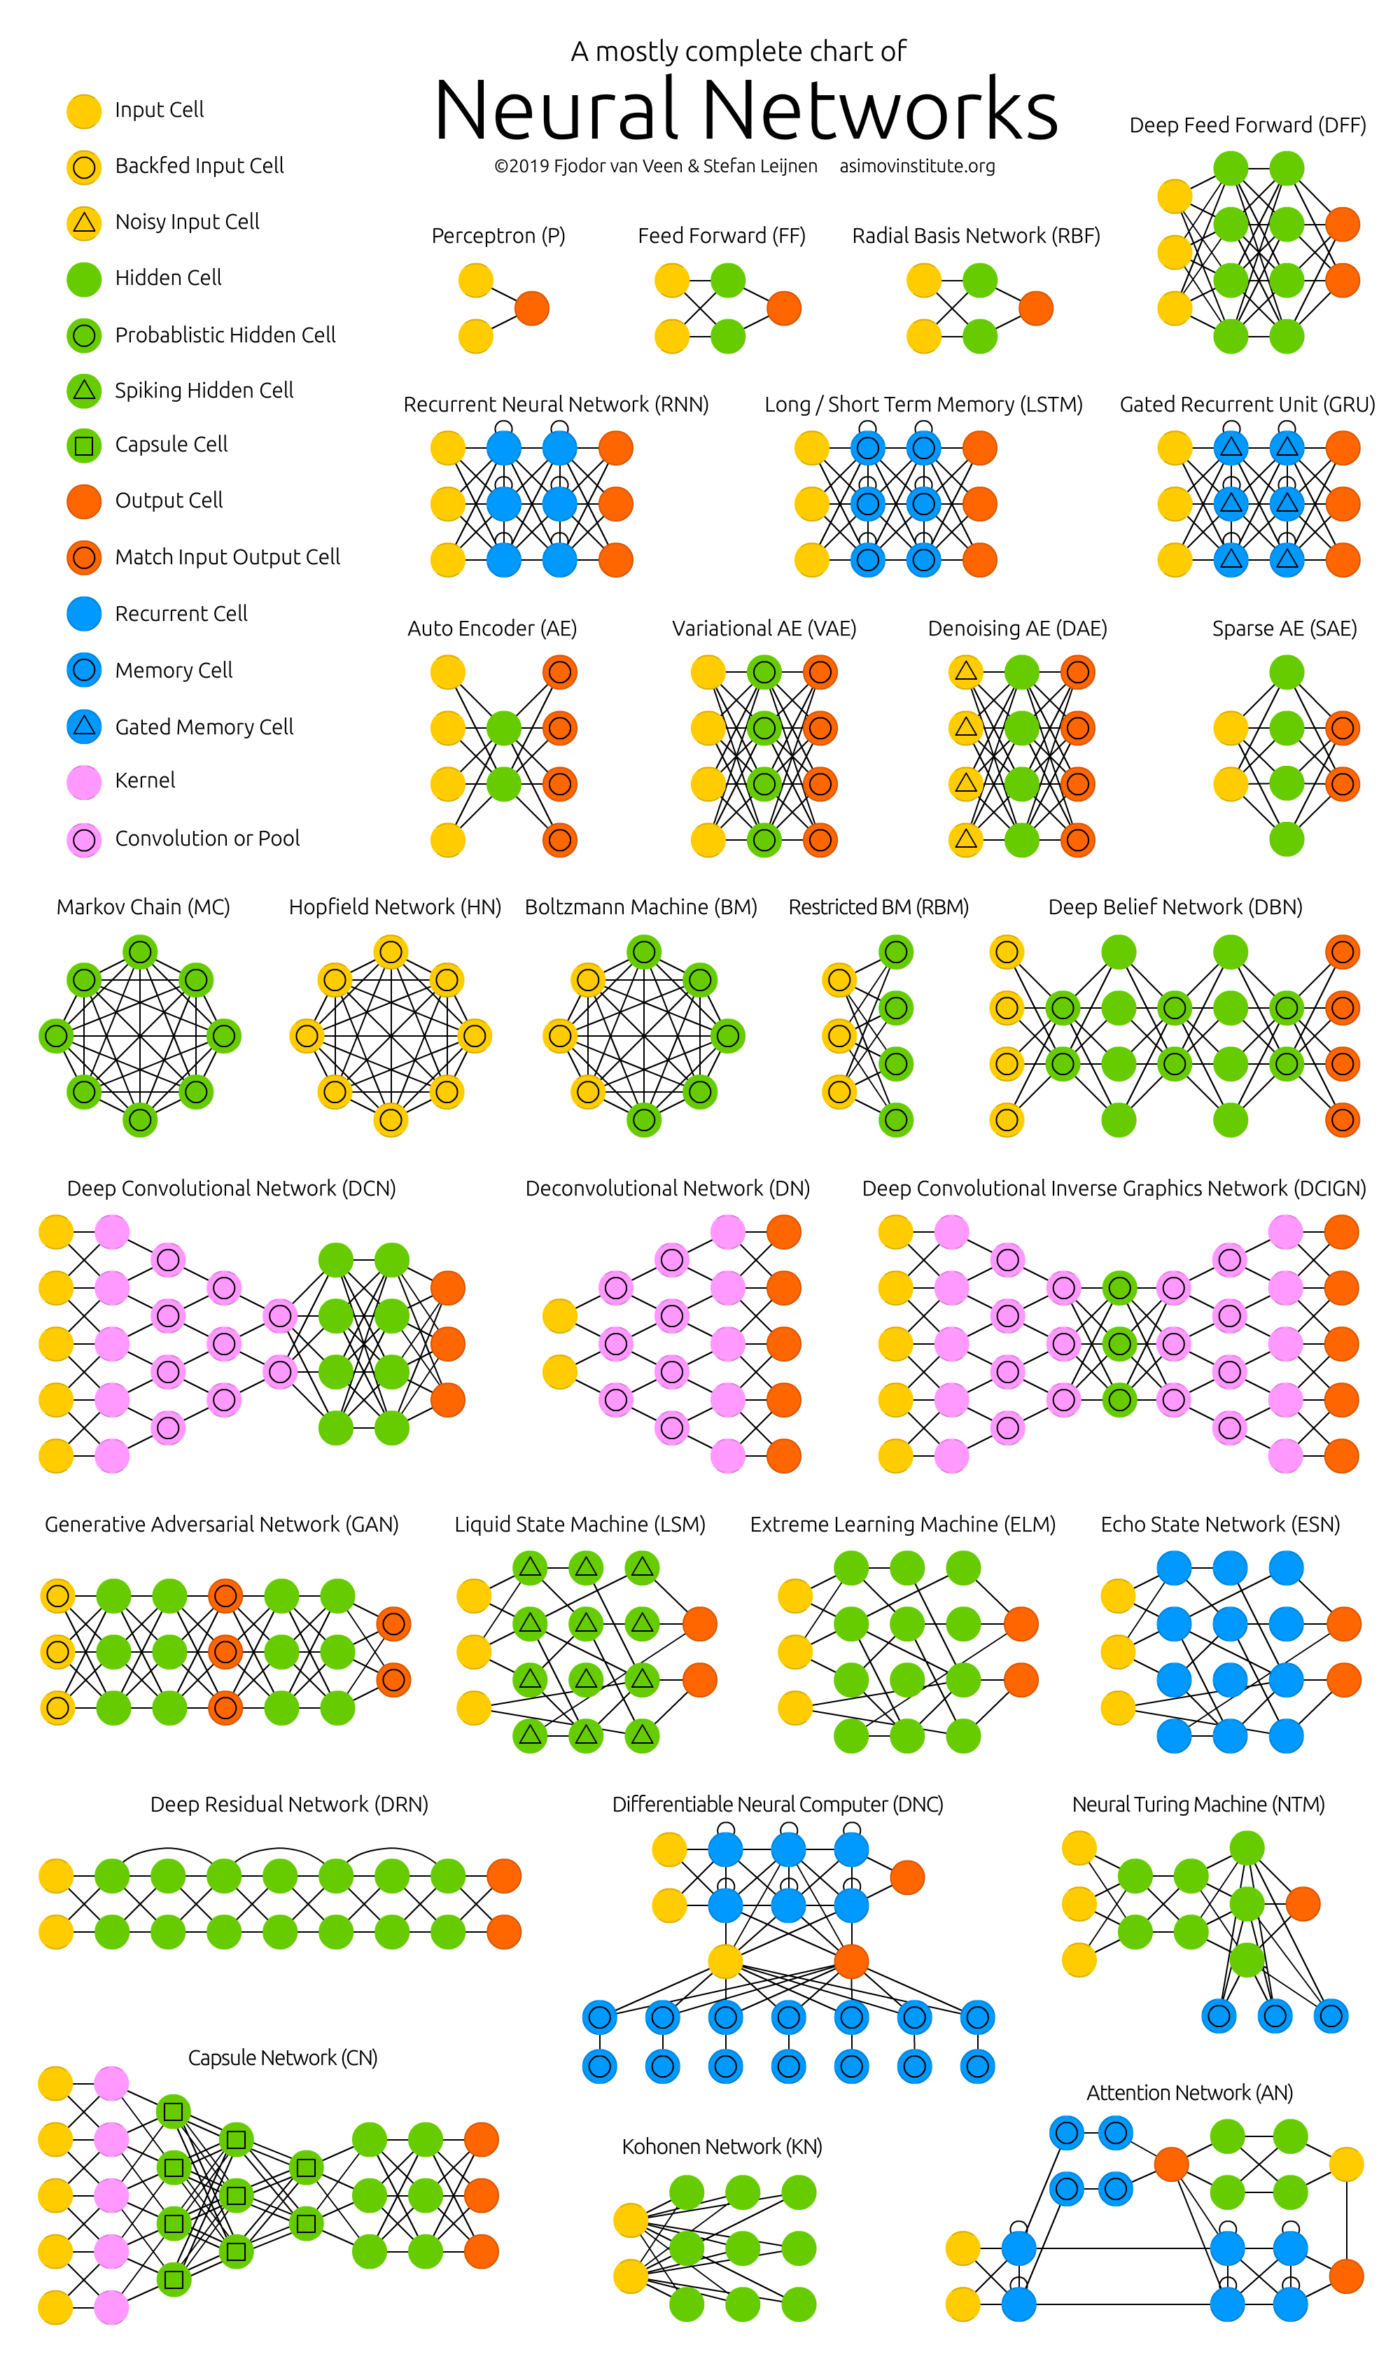

## Data Preparation

In PyTorch, `Dataset` and `DataLoader` in `torch.utils.data` are used for data preparation.

- `Dataset` contains (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
  - We can determine how to load data through `Dataset`, `batch_size`, `train`, `transform` parameters in `DataLoader`

In [87]:
from torch.utils.data import Dataset, DataLoader

`torchvision` provide vision-related dataset

- `transforms`: method for preprocessing (https://pytorch.org/docs/stable/torchvision/transforms.html)
- Usually, make new class for transform and use it.


In [88]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [89]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize(mean=(0.5,), std = (1.0, ))])

In [91]:
trainset = datasets.MNIST(root='./content/',
                          train=True, download=True,
                          transform = mnist_transform)
testset = datasets.MNIST(root='./content/',
                          train=False, download=True,
                          transform = mnist_transform)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 20150954.48it/s]


Extracting ./content/MNIST/raw/train-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 59293046.41it/s]

Extracting ./content/MNIST/raw/train-labels-idx1-ubyte.gz to ./content/MNIST/raw



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 12825613.42it/s]


Extracting ./content/MNIST/raw/t10k-images-idx3-ubyte.gz to ./content/MNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 3349249.08it/s]

Extracting ./content/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./content/MNIST/raw



`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [92]:
#batch size
bs = 8
train_loader = DataLoader(trainset, batch_size=bs, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=bs, shuffle=False, num_workers=2)

In [94]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [95]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

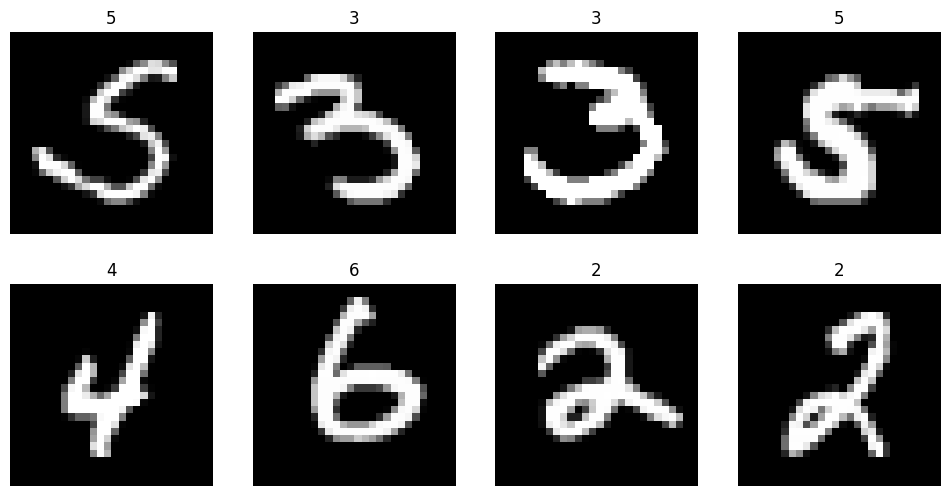

In [97]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## Build Neural Network

- layer: 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- module: 한 개 이상의 계층이 모여서 구성
- model: 한 개 이상의 모듈이 모여서 구성


### `torch.nn` Package

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


In [98]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [99]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 1.0401e+00, -6.7585e-02, -3.2315e-01,  ..., -1.8554e-01,
          2.9679e-02, -3.5281e-01],
        [ 2.1784e+00,  1.7902e+00, -7.3618e-01,  ...,  5.6374e-01,
          1.3983e+00,  7.0517e-01],
        [-1.1538e-01, -5.2606e-01, -2.0002e+00,  ...,  6.2288e-02,
         -2.3503e+00, -3.7274e-01],
        ...,
        [ 8.0814e-01, -4.3821e-01,  1.5000e+00,  ..., -2.0522e-01,
          1.8146e-01, -5.2308e-01],
        [ 7.9111e-02, -2.2299e+00, -1.0031e+00,  ...,  9.1446e-01,
          6.0695e-01, -1.5041e-03],
        [ 1.2011e+00,  3.2816e-01, -8.7923e-01,  ...,  1.2214e+00,
          1.4684e+00, -5.1419e-01]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.4810, -0.7720, -0.4806,  ..., -0.9844,  0.6110,  0.5630],
        [-0.6096, -0.4075, -0.2994,  ..., -0.2205, -0.2967, -0.2687],
        [ 0.9180,  0.8966,  0.3421,  ..., -1.0162,  0.9713,  0.9564],
        ...,
        [-0.0042,  0.9526,  0.2768,  ..., -0.6736,  0.5122, -1.0539],
        [ 1.6041, -0.448

`nn.Conv2d` 계층 예시


In [100]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [101]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2))
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [102]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### Convolution Layers

`nn.Conv2d` example

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [103]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [104]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [105]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [106]:
weight = weight.detach()

In [107]:
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

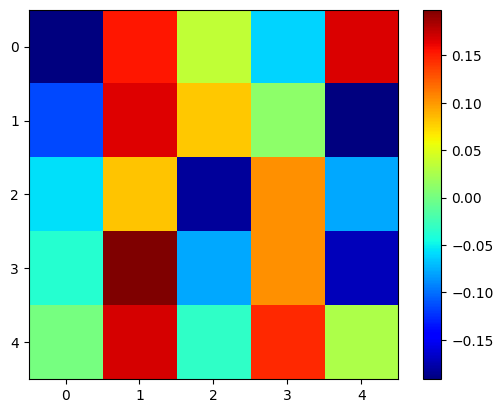

In [108]:
plt.imshow(weight[0, 0, :, :], 'jet')
plt.colorbar()
plt.show()

In [109]:
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())


torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [110]:
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.size())

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

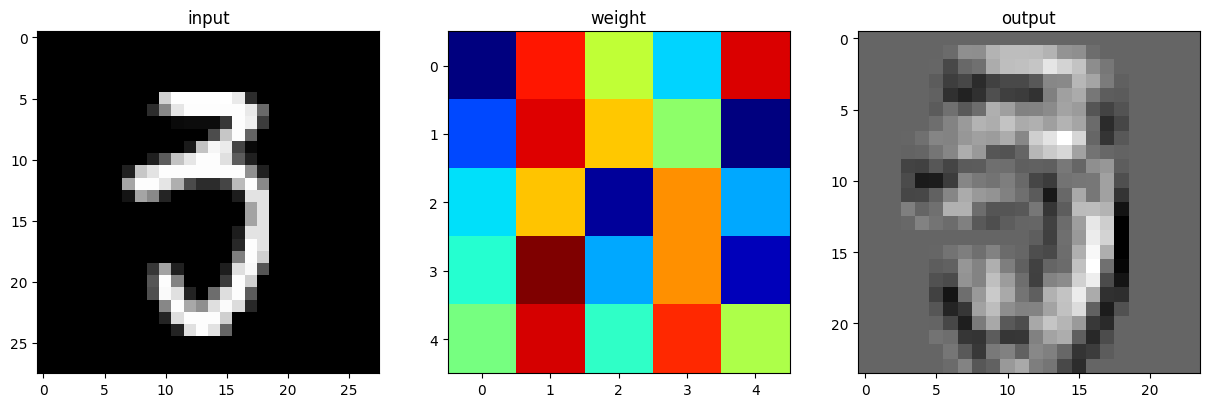

In [111]:
plt.figure(figsize=(15, 30))
plt.subplot(131)
plt.title("input")
plt.imshow(input_image, 'gray')
plt.subplot(132)
plt.title("weight")
plt.imshow(weight[0, 0, :, :], 'jet')
plt.subplot(133)
plt.title("output")
plt.imshow(output_arr[0, 0, :, :], 'gray')

### Pooling layers

- `F.max_pool2d`
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [112]:
import torch.nn.functional as F

pool = F.max_pool2d(output, 2, 2)
pool.shape

torch.Size([1, 20, 12, 12])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [113]:
pool_arr = pool.numpy()


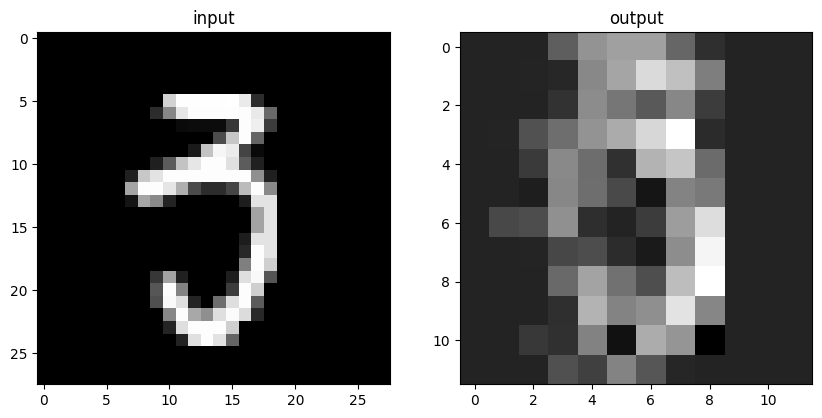

In [114]:
plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.title("input")
plt.imshow(input_image, 'gray')
plt.subplot(122)
plt.title("output")
plt.imshow(pool_arr[0, 0, :, :], 'gray')

### Linear layers

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [115]:
flatten = input_image.view(1, 28 * 28)
flatten.shape

torch.Size([1, 784])

In [116]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

In [117]:
lin

tensor([[ 0.1393, -0.4121, -0.3671, -0.2703, -0.1578,  0.4343, -0.0106, -0.2156,
         -0.0716, -0.0045]], grad_fn=<AddmmBackward0>)

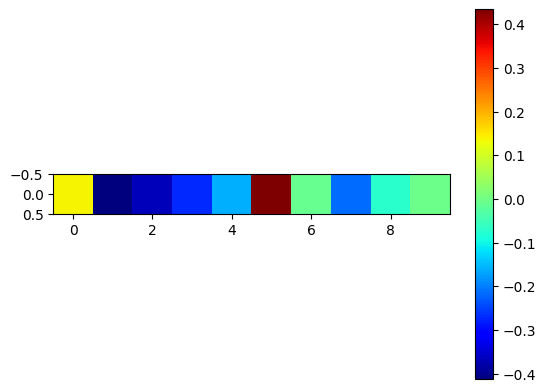

In [118]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### Non-linear Activations

`F.softmax`와 같은 활성화 함수 등

In [119]:
with torch.no_grad():
  flatten = input_image.view(1, 28*28)
  lin = nn.Linear(784, 10)(flatten)
  softmax = F.softmax(lin, dim=1)

softmax


tensor([[0.1513, 0.1457, 0.0775, 0.1122, 0.0626, 0.1008, 0.0815, 0.0707, 0.1064,
         0.0914]])

In [120]:
import numpy as np

np.sum(softmax.numpy())

0.99999994

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [121]:
inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [122]:
layer = nn.Conv2d(3, 20, 5, 1).to(device)
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

## Model Definition


### `nn.Module` class inheritance
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

위 두가지가 반드시 들어가있어야함

In [123]:
class Model(nn.Module):
  def __init__(self, inputs):
    super(Model, self).__init__()
    self.layer = nn.Linear(inputs, 1)
    self.activation = nn.Sigmoid()

  def forward(self, x):
    x = self.layer(x)
    x = self.activation(x)
    return x

In [124]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [125]:
class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2)
    )
    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5, out_features=10, bias=True),
        nn.ReLU(inplace=True)
    )

    def forward(self, x):
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)
      return x

In [126]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

## Model Parameters


### Loss function

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss` (Binary Cross Entropy) : 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [127]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()

### Optimizer

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 기준으로 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

Adadelta: stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks
* The continual decay of learning rates throughout training.
* The need for a manually selected global learning rate.

Adagrad: Adaptive Gradient Algorithm

Adam: stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

### Learning Rate Scheduler

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률이 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

### Metrics

* 모델의 학습과 테스트 단계를 모니터링

In [128]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 17.5 MB/s eta 0:00:0000:01


In [129]:
import torchmetrics

In [130]:
pred =  torch.randint(2, (10, ))
target = torch.randint(2, (10, ))
print(pred, target)

acc = torchmetrics.functional.accuracy(pred, target, task='binary')
print(acc)

tensor([0, 0, 1, 0, 0, 0, 1, 0, 0, 0]) tensor([0, 0, 1, 1, 0, 0, 1, 0, 0, 1])
tensor(0.8000)


In [131]:
metric = torchmetrics.Accuracy(task='binary')

n_batches = 10
for i in range(n_batches):
  preds = torch.randint(2, (10, ))
  target = torch.randint(2, (10, ))
  acc = metric(pred, target)
  print(acc)

tensor(0.5000)
tensor(0.5000)
tensor(0.7000)
tensor(0.5000)
tensor(0.4000)
tensor(0.2000)
tensor(0.3000)
tensor(0.7000)
tensor(0.7000)
tensor(0.6000)


## FashionMNIST Classification Model

GPU 설정

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

### Loading Data

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5, ))])

In [ ]:
trainset = datasets.FashionMNIST(root = '/content',
                                 train=True, download=True,
                                 transform = transform)
testset = datasets.FashionMNIST(root = '/content',
                                 train=False, download=True,
                                 transform = transform)

100%|██████████| 26421880/26421880 [00:03<00:00, 7026752.24it/s] 


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 58046.98it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2163232.03it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15163115.87it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(trainset, batch_size = 128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 128, shuffle=False, num_workers=2)

In [ ]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [ ]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

In [ ]:
label_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

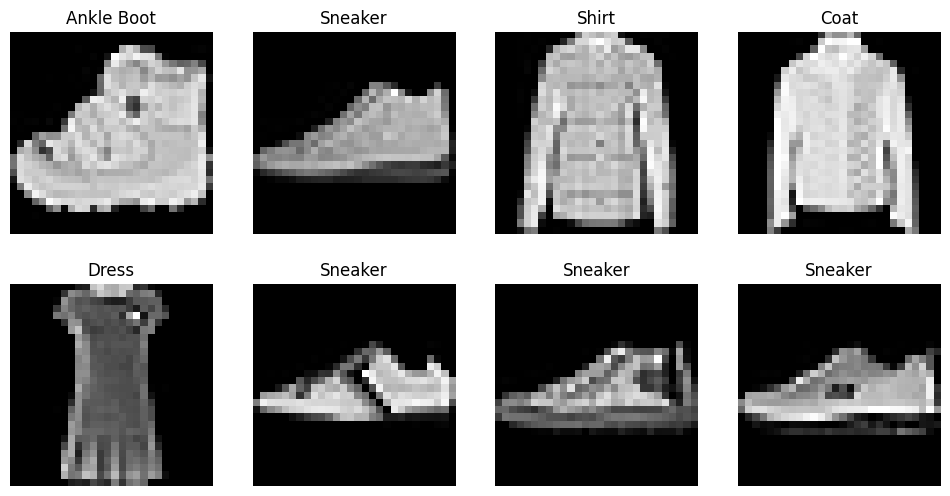

In [ ]:
figure = plt.figure(figsize=(12, 6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1):
  sample_idx = torch.randint(len(trainset), size=(1, )).item()
  img, label = trainset[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(label_map[label])
  plt.axis("off")
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### Define Model and Parameter

In [ ]:
class NNet(nn.Module):
  def __init__(self):
    super(NNet, self).__init__()

    self.conv1 = nn.Conv2d(1, 6, 3)
    self.conv2 = nn.Conv2d(6, 16, 3)
    self.fc1   = nn.Linear(16*5*5, 120)
    self.fc2   = nn.Linear(120, 84)
    self.fc3   = nn.Linear(84, 10)

  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [ ]:
model = NNet()
print(model)

NNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
params = list(model.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [ ]:
input = torch.randn(1, 1, 28, 28)
out = model(input)
print(out)

tensor([[-0.0598,  0.0898,  0.0817,  0.0462,  0.0034,  0.1296, -0.0392,  0.0832,
         -0.1283, -0.0378]], grad_fn=<AddmmBackward0>)


### Loss Function and Optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

### Model Training

Check the number of batch

In [ ]:
total_batch = len(train_loader)
print(total_batch)

469


In [ ]:
for epoch in range(5):
  running_loss = 0.0

  for i, data in enumerate(train_loader, 0):
    inputs, labels = data

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 100 == 99:
      print('Epoch: {}, iter: {}, Loss {}'.format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

Epoch: 1, iter: 100, Loss 0.017146239832043646
Epoch: 1, iter: 200, Loss 0.01649303375929594
Epoch: 1, iter: 300, Loss 0.016887311354279518
Epoch: 1, iter: 400, Loss 0.016980070792138577
Epoch: 2, iter: 100, Loss 0.015623244136571884
Epoch: 2, iter: 200, Loss 0.01556132534146309
Epoch: 2, iter: 300, Loss 0.01514455594867468
Epoch: 2, iter: 400, Loss 0.015462938383221627
Epoch: 3, iter: 100, Loss 0.014039789929986
Epoch: 3, iter: 200, Loss 0.015124614283442497
Epoch: 3, iter: 300, Loss 0.014032129406929016
Epoch: 3, iter: 400, Loss 0.014163049556314946
Epoch: 4, iter: 100, Loss 0.013450943797826766
Epoch: 4, iter: 200, Loss 0.013726245325058698
Epoch: 4, iter: 300, Loss 0.013751773744821548
Epoch: 4, iter: 400, Loss 0.013960795488208532
Epoch: 5, iter: 100, Loss 0.012889970056712628
Epoch: 5, iter: 200, Loss 0.013539729461073876
Epoch: 5, iter: 300, Loss 0.014097431004047393
Epoch: 5, iter: 400, Loss 0.01356595317274332


### Model Save and Load

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드

In [ ]:
PATH = './fashion_mnist.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
model = NNet()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
model.parameters

<bound method Module.parameters of NNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

### Model Test

In [ ]:
def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()
  fig = plt.figure(figsize = (16, 8))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

In [ ]:
import torchvision

In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

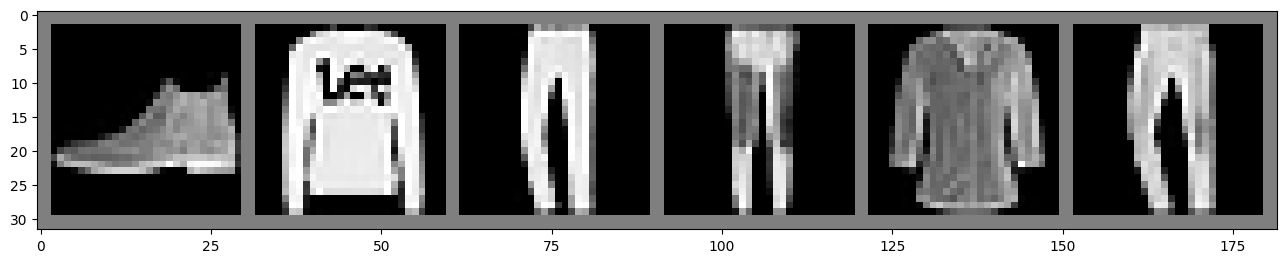

In [ ]:
imshow(torchvision.utils.make_grid(images[:6]))

In [ ]:
outputs = model(images)
_, predicted = torch.max(outputs, 1)
print(predicted)
print(predicted[0].numpy())

tensor([9, 2, 1, 1, 6, 1, 4, 4, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
        1, 2, 4, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 0, 9, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 3, 4, 7, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])
9


In [ ]:
print(''.join('{}, '.format(label_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [ ]:
correct = 0
total   = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  print(100 * correct / total)

88.57
